# NTDS TMDb DATA EXPLORE

Firstly, we import all the packages needed later.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(color_codes=True)
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import io
from PIL import Image

#%matplotlib inline
import json
import warnings
warnings.filterwarnings('ignore')  

## 1. Data Preprocessing 

We first do some basic handlings for the whole dataset. 

* Discard columns with more missing values and unused data, such as `homepage`, `overview` and `tagline`.


* Merge two sets of data `tmdb_5000_movies.csv` and `tmdb_5000_credits.csv` by using `id` and `movie_id`, then delete duplicate columns `title`. 


* View data details and complete missing values in `release_date` and `runtime`.


* standarize data format of some columns.

In [2]:
#import raw dataset
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

Then we firstly check the details of the data, and start to do the relevant data cleaning and processing

In [3]:
#View data information in 'tmdb_5000_movies.csv'
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
#View all column names and store them as dictionaries
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
#View data information in 'tmdb_5000_credits.csv'
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [6]:
#View all column names and store them as dictionaries
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
#Delete title in credits
del credits['title'] 

 Use `id` and `movie_id` to merge data, and get more details about the new dataset `movie_credit`

In [8]:
movie_credit= pd.merge(movies, credits, left_on='id', right_on='movie_id', how='left')
movie_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [9]:
#Delete unused data in analysis
movie_credit.drop(["homepage","movie_id","overview","tagline"],axis=1,inplace=True)
#View missing values
movie_credit.isnull().any()

budget                  False
genres                  False
id                      False
keywords                False
original_language       False
original_title          False
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
title                   False
vote_average            False
vote_count              False
cast                    False
crew                    False
dtype: bool

Fill in missing values in the new dataset `movie_credit` like `release_date` and `runtime`

In [10]:
movie_credit.loc[movie_credit['release_date'].isnull()==True]
movie_credit['release_date'] = movie_credit['release_date'].fillna('2015-03-01')

In [11]:
movie_credit.loc[movie_credit['runtime'].isnull()==True]
movie_credit['runtime'] = movie_credit['runtime'].fillna(113, limit=1)
movie_credit['runtime'] = movie_credit['runtime'].fillna(81, limit=1)

In [12]:
#Convert release_date column to date type
movie_credit['release_date'] = pd.to_datetime(movie_credit['release_date'],
                                      format='%Y-%m-%d', errors='coerce').dt.year

Define a list of JSON type column names, and convert each of them to a dictionary list

In [13]:
json_column = ['genres','keywords','production_companies',
               'production_countries','cast','crew']

for column in json_column:
    movie_credit[column]=movie_credit[column].map(json.loads)

#### Define several functions that will be used later, such as extracting director or actors.

Take out the value in the dictionary and separated by '|'

In [14]:
def getname(x):
    list = []
    for i in x:
        list.append(i['name'])
    return '|'.join(list)

Execute the `getname()` function on `genres, keywords, production_companies, production_countries` 

In [15]:
for column in json_column[0:4]:
    movie_credit[column] = movie_credit[column].map(getname)

To extract 2 actors：

In [16]:
def getactor(x):
    list = []
    for i in x:
        list.append(i['character'])
    return '|'.join(list[0:2])

Execute the `getcharacter()` function on `cast`

In [17]:
movie_credit['cast']=movie_credit['cast'].map(getactor)

To extract the director:

In [18]:
def getdirector(x):
    list=[]
    for i in x:
        if i['job']=='Director':
            list.append(i['name'])
    return "|".join(list)

Execute the `getdirector()` function on `crew`

In [19]:
movie_credit['crew']=movie_credit['crew'].map(getdirector)

In order to make the following operations more intuitive, we rename the data list. And backup the data

In [20]:
rename_dict = {'release_date':'year','cast':'actor','crew':'director'}
movie_credit.rename(columns=rename_dict, inplace=True)
original_df=movie_credit.copy()

In [21]:
movie_credit.head(2)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,year,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,actor,director
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,Avatar,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,Jake Sully|Neytiri,James Cameron
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner,Gore Verbinski


## 2. Data Visualization

### 2.1 Word cloud analysis 

Compared with traditional statistical methods, tag cloud(word clould) could quickly and intuitively help us find keyword information in a large amount of data. 

At the begining, in order to have a general understanding of the processed movie data. We used word cloud to visualize the high frequency movie keywords and types in the data. 

From the figure below, we can see that the words like `woman director`, `independent` and `relationship` appear highly in `keywords` section. On the other hand,
`drama` and `comdey` are constantly being proposed in terms of film `genres`.

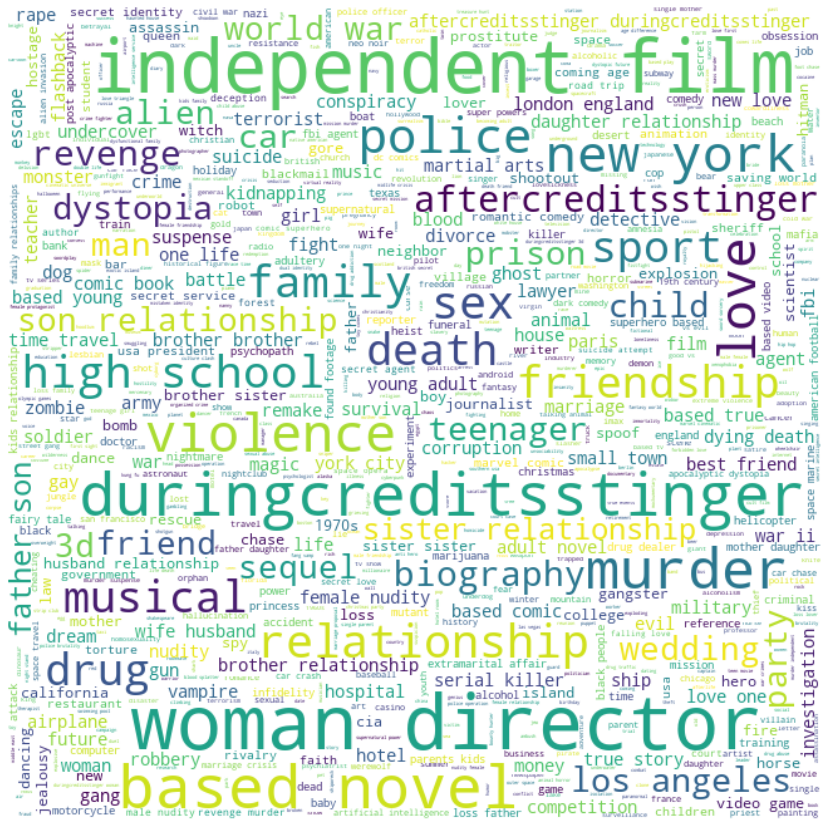

In [22]:
fig = plt.figure(figsize=(16,15))
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

img1 = Image.open('fig_1.jpg')
hcmask1 = np.array(img1)

words=movie_credit['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="white", max_words=4000, mask=hcmask1,
               stopwords=STOPWORDS, max_font_size= 60)
wc.generate(" ".join(word))

img1 = Image.open('fig_1.jpg')
hcmask1 = np.array(img1)

plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
# fig.savefig('word cloud.png',dpi=600)


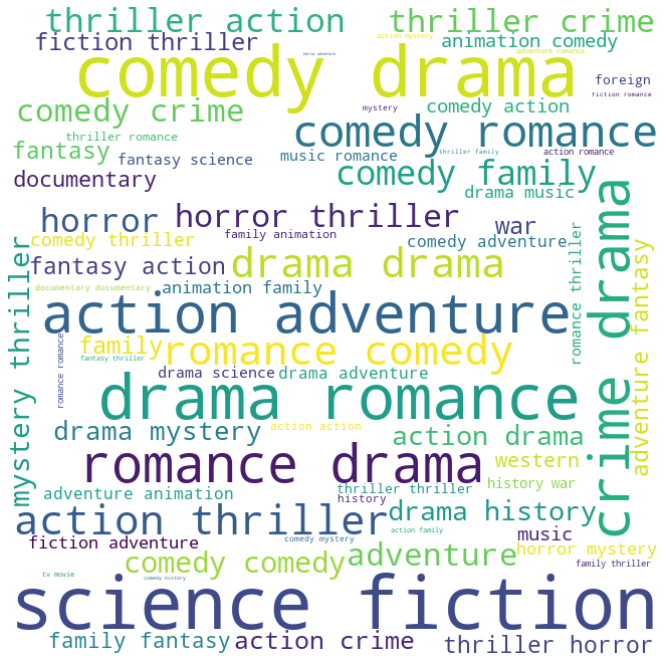

In [23]:
fig = plt.figure(figsize=(12,12))
stop_words=set(stopwords.words('english'))

words=movie_credit['genres'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="white", max_words=60000, mask=hcmask1,
               stopwords=STOPWORDS, max_font_size= 80)
wc.generate(" ".join(word))

img1 = Image.open('fig_1.jpg')
hcmask1 = np.array(img1)

plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
# fig.savefig('genres word cloud.png',dpi=400)

### 2.2 Film Genre Analysis

Make a preliminary understanding of the data through the existing data

Text(0.5, 1.0, 'Film number by year')

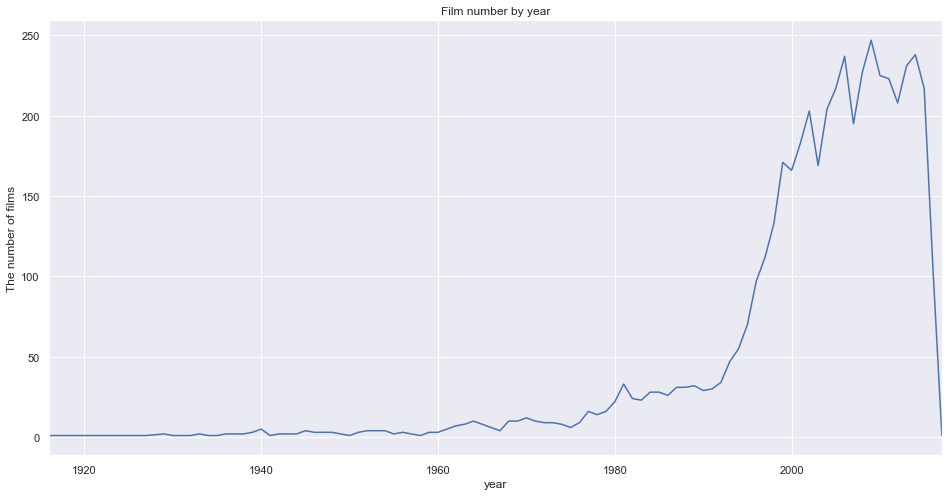

In [24]:
movie_credit.groupby('year')['original_title'].count().plot(kind='line', figsize=(16, 8));
plt.ylabel('The number of films')
plt.title("Film number by year")
# fig.savefig('The number of films by year.png',dpi=650)

In this step, the number of different movie genres during the period from 1960 to 2017 is counted and visualized by descending order.

In [25]:
#Extract genres and store them in a deduplication collection
genre_set = set()  
for x in movie_credit['genres']:
    genre_set.update(x.split('|'))  #genres are separated by '|'
genre_set.discard('')  

In [26]:
#one-hot encoding for all genres
genre_df = pd.DataFrame()  
for genre in genre_set:
    genre_df[genre] = movie_credit['genres'].str.contains(genre).map(lambda x:1 if x else 0)

In [27]:
#Add year column to 'genre_df' data frame
genre_df['year']=movie_credit['year']
genre_df.head(2)

,Horror,Adventure,Comedy,Thriller,Animation,Family,Drama,TV Movie,History,Documentary,...,Fantasy,Science Fiction,Music,Mystery,Foreign,Crime,Romance,Western,War,year
0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2009
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2007


In [28]:
#Group 'genre_df' by year and calculate the sum of each group
genre_by_year = genre_df.groupby('year').sum()  
genresum_by_year = genre_by_year.sum().sort_values(ascending=False)

Calculate the total number of movies of each genre, and arrange them in descending order.

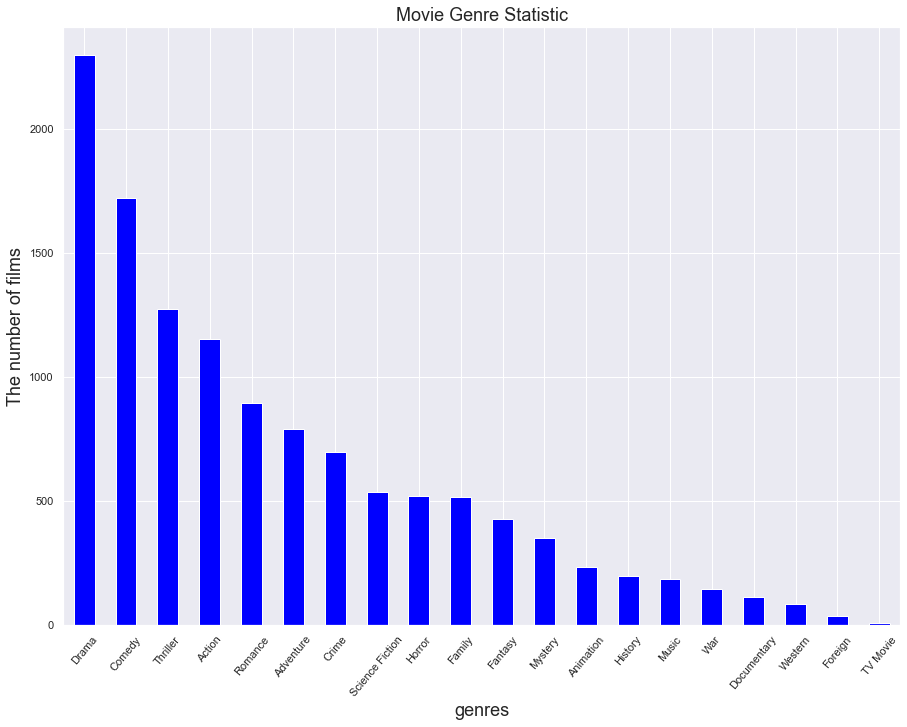

In [29]:
fig = plt.figure(figsize=(15,11))   
ax = plt.subplot(1,1,1)     
ax = genresum_by_year.plot.bar(color = 'blue')
plt.xticks(rotation=50)
plt.title('Movie Genre Statistic', fontsize=18)    
plt.xlabel('genres', fontsize=18)    
plt.ylabel('The number of films', fontsize=18)    
plt.show()
# fig.savefig('the number of film.png',dpi=650)

It can be seen from the statistical graph of movie genres that drama, comedy and thriller account for a large proportion. 

Therefore, there are top eight genres have been extracted and we try to use it to explore the changing trend of movie style over time. 

Finally, we could give some suggestions to the director who is going to make the film.

In [30]:
#Get the top eight movie genres
genre_by_year = genre_by_year[['Drama','Comedy','Thriller','Horror',
                               'Romance','Adventure','Crime','Science Fiction']].loc[1960:,:]
year_min = movie_credit['year'].min()   
year_max = movie_credit['year'].max() 

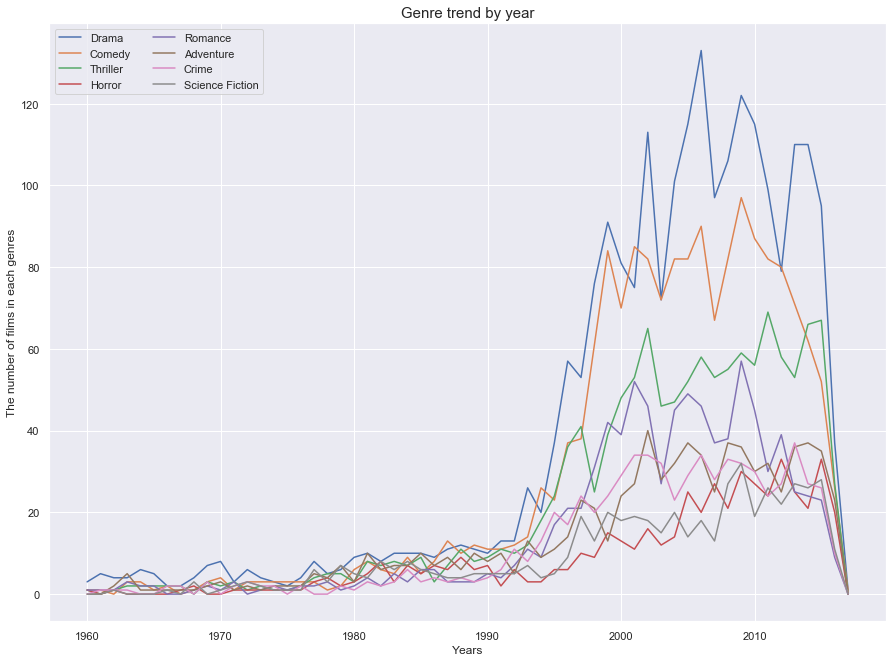

In [31]:
fig = plt.figure(figsize=(15,11))
ax1 = plt.subplot(1,1,1)
plt.plot(genre_by_year)
plt.xlabel('Years', fontsize=12)
plt.ylabel('The number of films in each genres', fontsize=12)
plt.title('Genre trend by year', fontsize=15)
plt.xticks(range(1960, 2017, 10))
plt.legend(['Drama','Comedy','Thriller','Horror',
                               'Romance','Adventure','Crime','Science Fiction'], loc='best',ncol=2)
# fig.savefig('Genre trend count by year.png',dpi=650)

From the figure we can clearly see that since the 1990s, the entire movie market has experienced explosive growth. 

The number of drama, comedy, thriller movies in the top 3 increased significantly.

### 2.3 Production Company Analysis 

Count the number of films of each production company, and select the top ten film companies for visualization.

In [32]:
company_movie=movie_credit[['production_companies','year']]
split_df=pd.DataFrame([x.split(',') for x in company_movie['production_companies']],index=company_movie.index)
company_movie=pd.merge(company_movie,split_df,left_index=True,right_index=True)
del company_movie['production_companies']
company_movie=company_movie.set_index('year')
company_movie=company_movie.stack()
company_movie=company_movie.reset_index()
company_movie=company_movie.rename(columns={0:'production_companies'})
companies=company_movie['production_companies'].value_counts()
companies_top10=companies[companies.index!=''].head(10)
companies_top10

Paramount Pictures                        58
Universal Pictures                        45
New Line Cinema                           38
Columbia Pictures                         37
 The                                      32
Metro-Goldwyn-Mayer (MGM)                 32
Twentieth Century Fox Film Corporation    31
Walt Disney Pictures                      27
Warner Bros.                              27
Touchstone Pictures                       26
Name: production_companies, dtype: int64

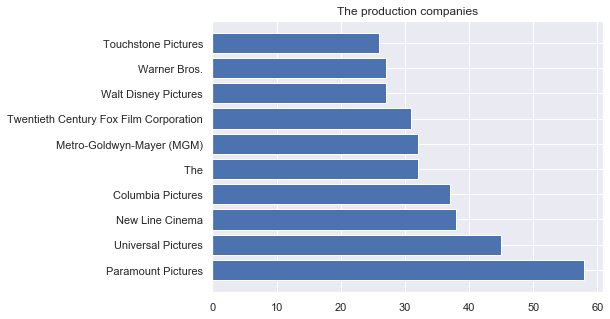

In [33]:
fig = plt.figure(figsize=(7,5))
ax=plt.subplot(111)
ax.barh(range(10),companies_top10.values,color='b')
ax.set_title('The production companies')
ax.set_yticks(range(10))
ax.set_yticklabels(companies_top10.index)

fig.savefig('The production companies.png',dpi=600)

`Paramount Pictures` and `Universal Pictures` have more outputs than other companies. 

In order to give other companies some suggestions, we try to analyze these two companies on film genre. For example, what is the film style that the two companies like?

Count the top 8 genres of film in each company.

In [34]:
company_list = ['Universal Pictures', 'Paramount Pictures']
company_df = pd.DataFrame()
for company in company_list:
    company_df[company]=movie_credit['production_companies'].str.contains(company).map(lambda x:1 if x else 0)
company_df = pd.concat([company_df,genre_df.iloc[:,:-1],movie_credit['revenue']],axis=1)

Uni_vs_Para = pd.DataFrame(index=['Universal Pictures', 'Paramount Pictures'],
                           columns=company_df.columns[2:])

Uni_vs_Para.loc['Universal Pictures']=company_df.groupby('Universal Pictures',
               as_index=False).sum().iloc[1,2:]
Uni_vs_Para.loc['Paramount Pictures']=company_df.groupby('Paramount Pictures',
               as_index=False).sum().iloc[1,2:]

In [35]:
Uni_vs_Para = Uni_vs_Para.T
universal = Uni_vs_Para['Universal Pictures'].iloc[:-1]
paramount = Uni_vs_Para['Paramount Pictures'].iloc[:-1]

In [36]:
#after the 8th is others
universal['others']=universal.sort_values(ascending=False).iloc[7:].sum()
universal = universal.sort_values(ascending=False).iloc[-8:]
universal

History        14
War            10
Music          10
Animation       8
Western         2
Documentary     1
Foreign         0
TV Movie        0
Name: Universal Pictures, dtype: int64

In [37]:
#after the 8th is others
paramount['others']=paramount.sort_values(ascending=False).iloc[7:].sum()
paramount = paramount.sort_values(ascending=False).iloc[-8:]
paramount

Music          12
Animation      12
War             8
History         8
Western         6
Documentary     4
Foreign         0
TV Movie        0
Name: Paramount Pictures, dtype: int64

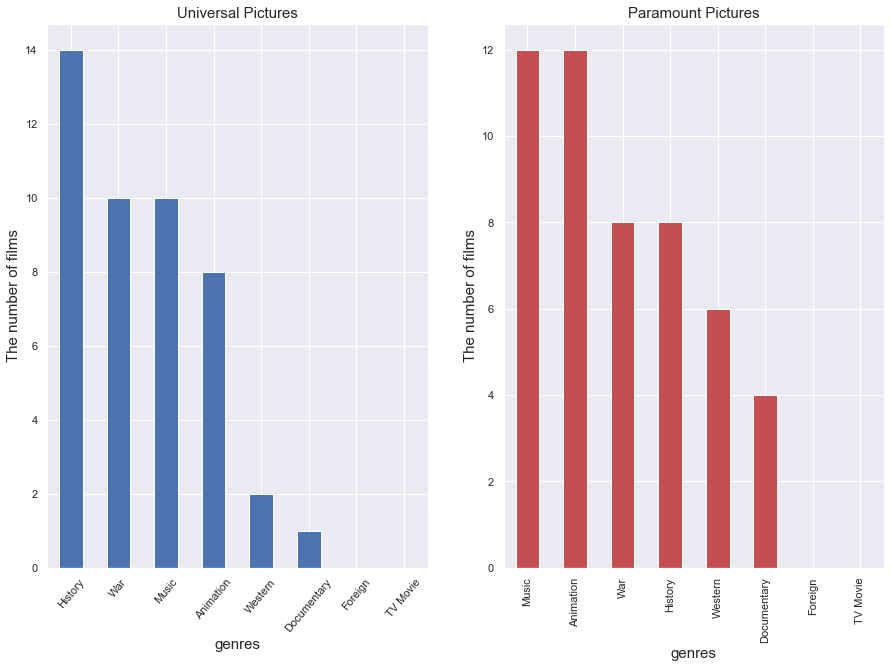

In [38]:
fig = plt.figure(figsize=(15,10))   
ax1 = plt.subplot(1,2,1)     
ax1 = universal.plot.bar(color = 'b')
plt.xticks(rotation=50)
plt.title('Universal Pictures',fontsize=15)    
plt.xlabel('genres', fontsize=15)    
plt.ylabel('The number of films', fontsize=15)    
ax2 = plt.subplot(1,2,2)     
ax1 = paramount.plot.bar(color = 'r')
plt.title('Paramount Pictures',fontsize=15)    
plt.xlabel('genres', fontsize=15)    
plt.ylabel('The number of films', fontsize=15)    
plt.show()
# fig.savefig('The genres in two companies.png',dpi=650)

Universal Pictures prefers `comedy` and `drama`. And in Paramount Pictures the `Drama, Thriller, Comedy` and `Action` are popular. 

### 2.4 Cost-benefit Analysis

The profit of a movie is one of the criteria for its success, and different styles of movies have different profitability. 

In this section, we try to analysis the cost-benfit analysis `profit` based on the original data `revenue` and `budget`.


<center>$profit = revenue - budget$ </center>

In [39]:
#Add profit column
movie_credit['profit'] = movie_credit['revenue'] - movie_credit['budget']
profit_df = pd.DataFrame()
profit_df = pd.concat([genre_df.iloc[:,:-1],movie_credit['profit']],axis=1) 
profit_df.head(3)

,Horror,Adventure,Comedy,Thriller,Animation,Family,Drama,TV Movie,History,Documentary,...,Fantasy,Science Fiction,Music,Mystery,Foreign,Crime,Romance,Western,War,profit
0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2550965087
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,661000000
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,635674609


In this section, the data were grouped by year, to calculate the average annual profit

Text(0, 0.5, 'profit_mean')

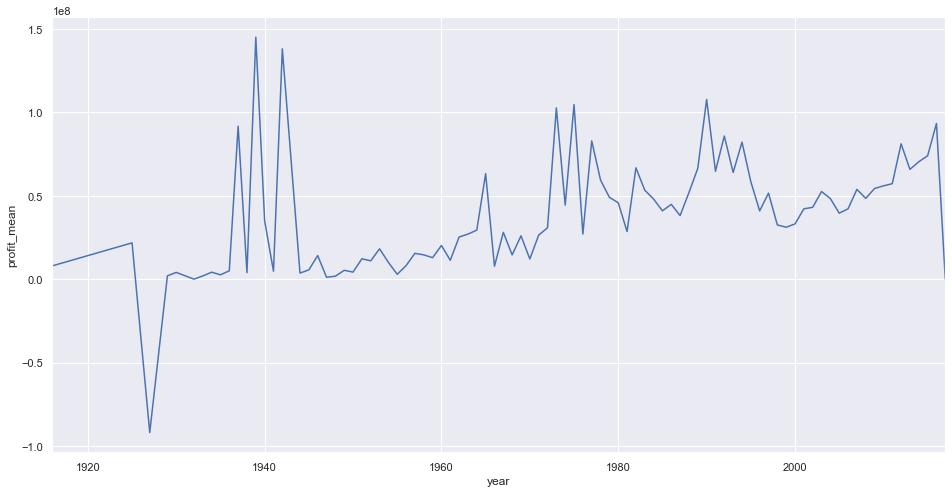

In [40]:
movie_credit.groupby(['year'])['profit'].mean().plot(kind='line', figsize=(16, 8))

plt.ylabel('profit_mean')

Create a Series with an index of each `genre` and a sum of profit calculated by genre classification

In [41]:
profit_by_genre = pd.Series(index=genre_set)
for genre in genre_set:
    profit_by_genre.loc[genre]=profit_df.loc[:,[genre,'profit']].groupby(genre, as_index=False).sum().loc[1,'profit']
    
print(profit_by_genre)



Horror             1.503597e+10
Adventure          1.124433e+11
Comedy             7.917081e+10
Thriller           6.252293e+10
Animation          3.725915e+10
Family             5.726413e+10
Drama              7.221287e+10
TV Movie          -9.200000e+06
History            5.441159e+09
Documentary        7.904160e+08
Action             1.035165e+11
Fantasy            5.503250e+10
Science Fiction    5.381617e+10
Music              6.021381e+09
Mystery            1.654964e+10
Foreign           -9.976856e+06
Crime              2.665739e+10
Romance            3.548378e+10
Western            1.571716e+09
War                7.037772e+09
dtype: float64


Create a Series with an index of each genre and a sum of budget calculated by genre

In [42]:
budget_df = pd.concat([genre_df.iloc[:,:-1],movie_credit['budget']],axis=1)
budget_df.head(2)
budget_by_genre = pd.Series(index=genre_set)
for genre in genre_set:
    budget_by_genre.loc[genre]=budget_df.loc[:,[genre,'budget']].groupby(genre,as_index=False).sum().loc[1,'budget']
    
print(budget_by_genre)

Horror             7.563922e+09
Adventure          5.239822e+10
Comedy             4.358971e+10
Thriller           4.072750e+10
Animation          1.555302e+10
Family             2.601911e+10
Drama              4.749811e+10
TV Movie           9.200000e+06
History            5.890983e+09
Documentary        2.918617e+08
Action             5.944341e+10
Fantasy            2.694970e+10
Science Fiction    2.774807e+10
Music              2.942970e+09
Mystery            1.069908e+10
Foreign            2.237501e+07
Crime              1.938347e+10
Romance            1.815836e+10
Western            2.220454e+09
War                5.080674e+09
dtype: float64


In [43]:
#Merge data and change column names
profit_rate = pd.concat([profit_by_genre, budget_by_genre],axis=1)
profit_rate.columns=['profit','budget'] 

Add the profit_rate, and visualize the profit (bar chart) and profit rate (line chart) of different style movies.

<center>$profit$_$rate = profit $  /  $ budget$ </center>

In [44]:
profit_rate['profit_rate'] = (profit_rate['profit']/profit_rate['budget'])*100
profit_rate.sort_values(by=['profit','profit_rate'], ascending=False, inplace=True)
print(profit_rate)

                       profit        budget  profit_rate
Adventure        1.124433e+11  5.239822e+10   214.593817
Action           1.035165e+11  5.944341e+10   174.142960
Comedy           7.917081e+10  4.358971e+10   181.627275
Drama            7.221287e+10  4.749811e+10   152.033141
Thriller         6.252293e+10  4.072750e+10   153.515285
Family           5.726413e+10  2.601911e+10   220.084891
Fantasy          5.503250e+10  2.694970e+10   204.204538
Science Fiction  5.381617e+10  2.774807e+10   193.945619
Animation        3.725915e+10  1.555302e+10   239.562119
Romance          3.548378e+10  1.815836e+10   195.412935
Crime            2.665739e+10  1.938347e+10   137.526455
Mystery          1.654964e+10  1.069908e+10   154.682824
Horror           1.503597e+10  7.563922e+09   198.785401
War              7.037772e+09  5.080674e+09   138.520444
Music            6.021381e+09  2.942970e+09   204.602160
History          5.441159e+09  5.890983e+09    92.364192
Western          1.571716e+09  

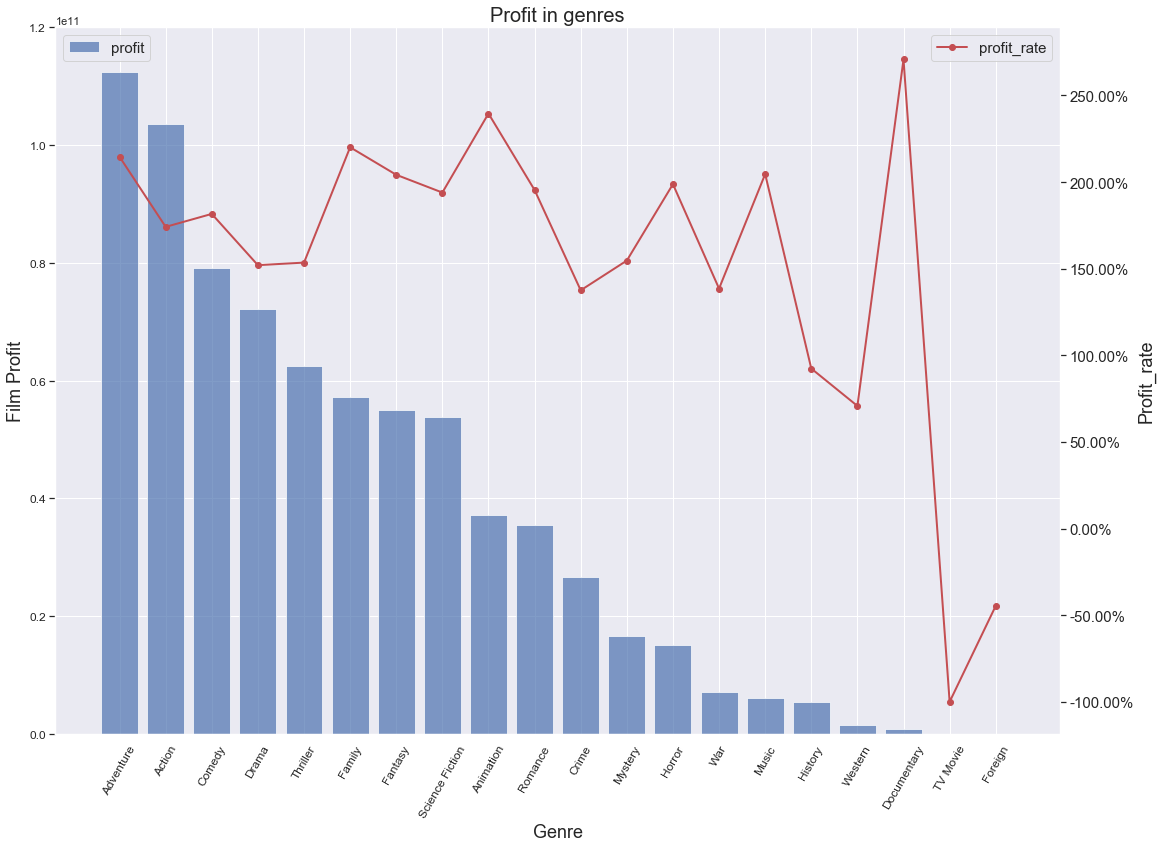

In [45]:

x = list(range(len(profit_rate.index)))
xl = profit_rate.index

fig = plt.figure(figsize=(18,13))
ax1 = fig.add_subplot(111)
plt.bar(x, profit_rate['profit'],label='profit',alpha=0.7)
plt.xticks(x,xl,rotation=60,fontsize=12)
plt.yticks(fontsize=12)
ax1.set_title('Profit in genres', fontsize=20)
ax1.set_ylabel('Film Profit',fontsize=18)
ax1.set_xlabel('Genre',fontsize=18)
ax1.set_ylim(0,1.2e11)
ax1.legend(loc=2,fontsize=15)

ax2 = ax1.twinx()
ax2.plot(x, profit_rate['profit_rate'],'ro-',lw=2,label='profit_rate')
fmt='%.2f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
plt.xticks(x,xl,fontsize=12,rotation=60)
plt.yticks(fontsize=15)
ax2.set_ylabel('Profit_rate',fontsize=18)
ax2.legend(loc=1,fontsize=15)
plt.grid(False)
# fig.savefig('The profit by genres.png',dpi=650)

Extract several features to analyze the relationship between movie revenue by using correlation function

In [46]:
movie_credit_cov = movie_credit[['runtime','popularity','vote_average',
      'vote_count','budget','revenue']].corr()

movie_credit_cov

,runtime,popularity,vote_average,vote_count,budget,revenue
runtime,1.000000,0.225573,0.375207,0.271990,0.269945,0.251136
popularity,0.225573,1.000000,0.273952,0.778130,0.505414,0.644724
vote_average,0.375207,0.273952,1.000000,0.312997,0.093146,0.197150
vote_count,0.271990,0.778130,0.312997,1.000000,0.593180,0.781487
budget,0.269945,0.505414,0.093146,0.593180,1.000000,0.730823
revenue,0.251136,0.644724,0.197150,0.781487,0.730823,1.000000


Use figures to verify the correlation between different features  `vote_count, budge, popularity` and `revenue`

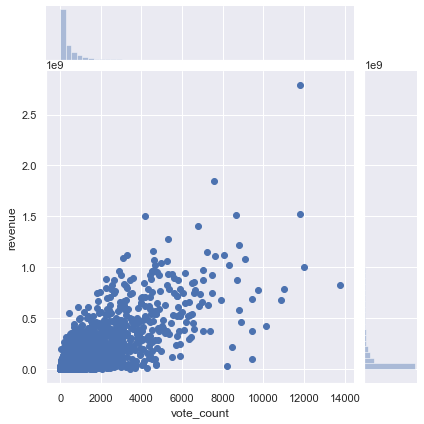

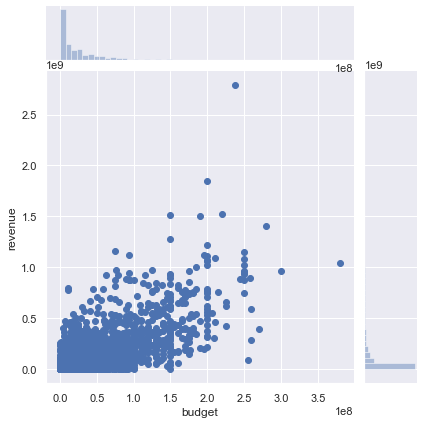

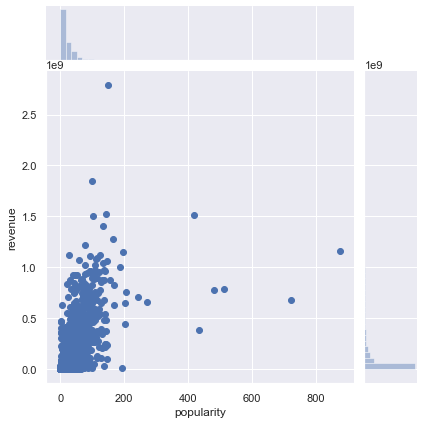

In [47]:
sns.jointplot(x='vote_count', y='revenue', data=movie_credit)
sns.jointplot(x='budget', y='revenue', data=movie_credit)
# sns.jointplot(x='vote_average',y='revenue', data=movie_credit)
sns.jointplot(x='popularity', y='revenue', data=movie_credit)

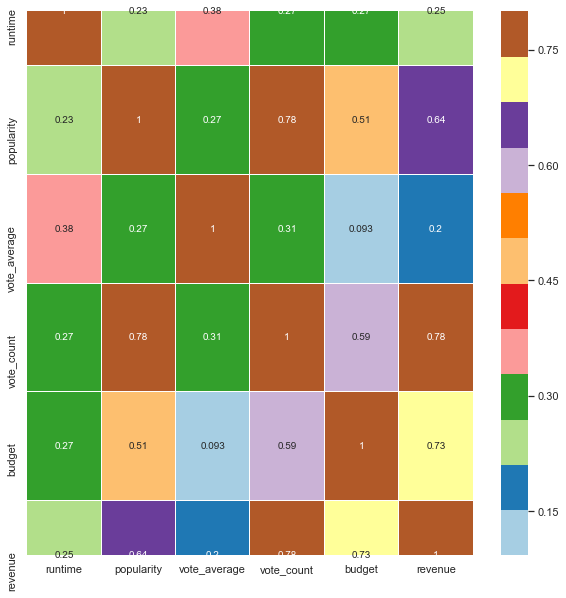

In [48]:
revenue_cov = movie_credit_cov
fig = plt.figure(figsize=(10,10))
# f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(revenue_cov,cbar=True, linewidths=0.05, annot=True, vmax=0.8, cmap='Paired',square=False)
fig.savefig('The cov.png',dpi=60)

At the same time, because there is a strong correlation between the popularity and the revenue, we try to find out the first 20 popular movies to analyze the `budget` and `revenue` in detail.

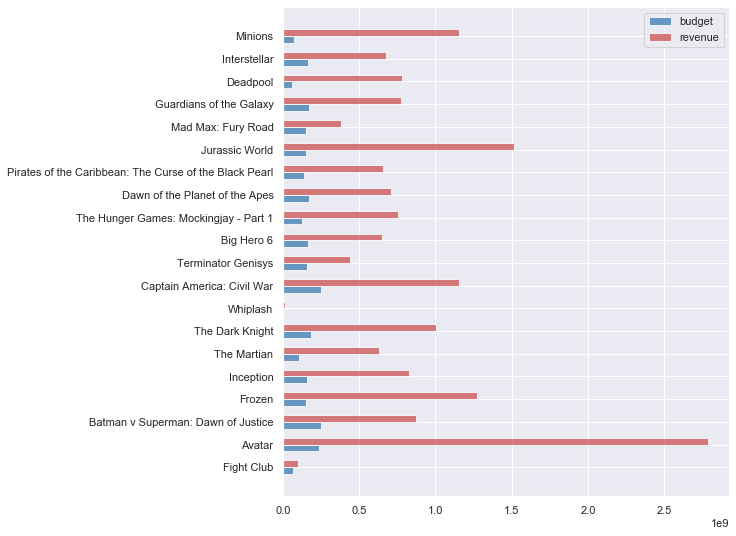

In [49]:
pro_movies = movie_credit[['original_title','revenue',"popularity","budget"]].sort_values(by='popularity', ascending=False)[:20].sort_values(by='popularity', ascending=True)


x_data = pro_movies["original_title"]
y_data = pro_movies["budget"]
y_data2 = pro_movies["revenue"]

fig = plt.figure(figsize=(8,9))

bar_width=0.3
plt.barh(y=range(len(x_data)), width=y_data, label='budget', color='steelblue', alpha=0.8, height=bar_width)

plt.barh(y=np.arange(len(x_data))+bar_width, width=y_data2, label='revenue', color='indianred', alpha=0.8, height=bar_width)
plt.yticks(np.arange(len(x_data))+bar_width/2, x_data)

plt.legend()
plt.show()
fig.savefig('The popular.png',dpi=600)

From the figure we could know that the more popular movies are, the more income they generate. In particular, Avatar showed a markedly high rate of return.

### 2.5 Director Analysis 

For a movie, the director is also an important factor in determining its quality. 

We try to choose the top 5 directors with higher output rates, and get the top 3 films with high revenue from their films.

Then we take out some details of the movie separately such as `vote_average, genres, year`, sorted by descending score.

In [50]:
director_movie = movie_credit[['original_title', 'revenue', 'director']]
director_movie.groupby(movie_credit['director'])['original_title'].count().sort_values(ascending=False).iloc[1:6]

director
Steven Spielberg    26
Woody Allen         21
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        16
Name: original_title, dtype: int64

In [51]:
directors = list(director_movie.groupby(director_movie['director'])['original_title'].count().sort_values(ascending=False).iloc[1:6].index)
f1 =[]
f2 =[]
f3 =[]
f4 =[]
f5 =[]
for director in directors:
    a = list(movie_credit[(movie_credit['director']== director)]['vote_average'].sort_values(ascending=False)[0:3].rename(index = movie_credit['original_title']).index)
    b = list(movie_credit[(movie_credit['director']== director)]['vote_average'].sort_values(ascending=False)[0:3].rename(index = movie_credit['genres']).index)
    c = list(movie_credit[(movie_credit['director']== director)]['vote_average'].sort_values(ascending=False)[0:3].rename(index = movie_credit['director']).index)
    d = list(movie_credit[(movie_credit['director']== director)]['vote_average'].sort_values(ascending=False)[0:3].rename(index = movie_credit['vote_average']).index)
    e = list(movie_credit[(movie_credit['director']== director)]['vote_average'].sort_values(ascending=False)[0:3].rename(index = movie_credit['year']).index)
    f1 += a
    f2 += b
    f3 += c
    f4 += d
    f5 += e
items = {'director': pd.Series(f3),'original_title': pd.Series(f1), 'revenue': pd.Series(f2),'vote_average': pd.Series(f4), 'year': pd.Series(f5)}
df_dir_mov = pd.DataFrame(items)
df_dir_mov

,director,original_title,revenue,vote_average,year
0,Steven Spielberg,Schindler's List,Drama|History|War,8.3,1993
1,Steven Spielberg,Saving Private Ryan,Drama|History|War,7.9,1998
2,Steven Spielberg,The Color Purple,Drama,7.7,1985
3,Woody Allen,Annie Hall,Comedy|Drama|Romance,7.8,1977
4,Woody Allen,Midnight in Paris,Fantasy|Comedy|Romance,7.4,2011
5,Woody Allen,Match Point,Drama|Thriller|Crime|Romance,7.3,2005
6,Clint Eastwood,Gran Torino,Drama,7.8,2008
7,Clint Eastwood,Unforgiven,Western,7.7,1992
8,Clint Eastwood,Million Dollar Baby,Drama,7.7,2004
9,Martin Scorsese,GoodFellas,Drama|Crime,8.2,1990
